In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [148]:
ufo_df = pd.read_csv('../data/nuforc.csv')
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148451 entries, 0 to 148450
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  148451 non-null  int64 
 1   image_link  148451 non-null  object
 2   occurred    148153 non-null  object
 3   city        147920 non-null  object
 4   state       139495 non-null  object
 5   country     148451 non-null  object
 6   shape       142108 non-null  object
 7   summary     148377 non-null  object
 8   reported    148451 non-null  object
 9   posted      148451 non-null  object
 10  image       4277 non-null    object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [149]:
ufo_df['country'].nunique()

395

In [150]:
ufo_df['country'].value_counts()

USA                       132522
Canada                      5938
United Kingdom              3437
Australia                    952
India                        488
                           ...  
Dominica, West Indies          1
sri lanka                      1
Caribbean (Grand Turk)         1
italy                          1
Germany/France                 1
Name: country, Length: 395, dtype: int64

In [151]:
ufo_df['city'].nunique()

30237

In [152]:
usa_ufos = ufo_df[ufo_df['country'] == 'USA']

In [153]:
us_city_counts = usa_ufos[['city', 'state']].value_counts()
us_city_counts = pd.DataFrame(us_city_counts).reset_index()
us_city_counts.columns = ['city', 'state', 'count']

us_city_counts.sort_values('count', ascending=False)
us_city_counts.head(10)

,city,state,count
0,Phoenix,AZ,773
1,Seattle,WA,742
2,Las Vegas,NV,648
3,Portland,OR,590
4,Los Angeles,CA,557
5,San Diego,CA,547
6,Tucson,AZ,472
7,Chicago,IL,446
8,Houston,TX,429
9,Albuquerque,NM,399


explored the 'state' field

In [154]:
usa_ufos[['state']].nunique()


state    61
dtype: int64

In [155]:
usa_ufos.state.unique()

array(['KY', 'SC', 'VA', 'CT', 'NH', 'CA', 'MA', 'ME', 'PA', 'NJ', 'OH',
       'NY', 'MD', 'IN', 'FL', 'WI', 'MI', 'AR', 'CO', 'IL', 'OR', 'AK',
       'NV', 'TX', 'UT', 'NC', 'TN', 'VT', 'WA', 'MS', 'WV', 'NE', 'OK',
       'NM', 'AZ', 'AL', 'ID', 'MT', 'MN', 'MO', 'LA', 'GA', 'IA', 'WY',
       'KS', 'DE', 'SD', 'RI', 'HI', '-', '0', 'ND', 'PR', 'DC', 'VI',
       'Fl', 'West Virginia', 'NB', 'GU', 'Ca', 'UM'], dtype=object)

began cleaning 'state' field. I checked to see if any of the territories were typos of states before removing.

In [156]:
usa_ufos[usa_ufos['state'] == 'GU']

,Unnamed: 0,image_link,occurred,city,state,country,shape,summary,reported,posted,image
45779,45779,<a data-content='Open' href='/sighting/?id=120...,7/13/2015 2:00,Inarajan (Guam),GU,USA,Light,Orange glowing light in sky that responded to ...,7/13/2015,7/17/2015,NaN
52715,52715,<a data-content='Open' href='/sighting/?id=177...,8/1/2014 17:59,Agana,GU,USA,Orb,Orange light orbs floating low.,8/1/2023,9/10/2023,NaN
142238,62238,<a data-content='Open' href='/sighting/?id=166...,5/1/1980 20:30,Inarajan (Guam),GU,USA,Circle,On a evening of May 19,2/7/2022,3/4/2022,NaN


In [157]:
usa_ufos = usa_ufos[usa_ufos['state'] != 'GU']

In [158]:
usa_ufos.state.unique()

array(['KY', 'SC', 'VA', 'CT', 'NH', 'CA', 'MA', 'ME', 'PA', 'NJ', 'OH',
       'NY', 'MD', 'IN', 'FL', 'WI', 'MI', 'AR', 'CO', 'IL', 'OR', 'AK',
       'NV', 'TX', 'UT', 'NC', 'TN', 'VT', 'WA', 'MS', 'WV', 'NE', 'OK',
       'NM', 'AZ', 'AL', 'ID', 'MT', 'MN', 'MO', 'LA', 'GA', 'IA', 'WY',
       'KS', 'DE', 'SD', 'RI', 'HI', '-', '0', 'ND', 'PR', 'DC', 'VI',
       'Fl', 'West Virginia', 'NB', 'Ca', 'UM'], dtype=object)

In [159]:
usa_ufos[usa_ufos['state'] == 'VI']

,Unnamed: 0,image_link,occurred,city,state,country,shape,summary,reported,posted,image
10028,10028,<a data-content='Open' href='/sighting/?id=165...,12/8/2021 17:30,Frederikste (Virgin Islands),VI,USA,Chevron,Triangle shapes moved very slowly to the north.,12/8/2021,12/19/2021,NaN
10551,10551,<a data-content='Open' href='/sighting/?id=165...,10/26/2021 11:00,Frederiksted St> Croix USVI,VI,USA,Oval,Noticed an image in a picture when looking at ...,12/7/2021,12/19/2021,Y
14328,14328,<a data-content='Open' href='/sighting/?id=160...,11/5/2020 5:45,Charlotte Amalie,VI,USA,Light,Eleven stars moving and then disappearing,11/4/2020,12/23/2020,NaN
20668,20668,<a data-content='Open' href='/sighting/?id=152...,1/12/2020 17:59,St. Thomas (USVI),VI,USA,Sphere,UFO seen above the US Virgin Islands.,1/28/2020,2/7/2020,NaN
49027,49027,<a data-content='Open' href='/sighting/?id=116...,12/31/2014 23:59,St. Thomas (U. S. Virgin Islands),VI,USA,Triangle,Red triangle seen over us Virgin Islands on Ne...,1/8/2015,1/9/2015,NaN
57009,57009,<a data-content='Open' href='/sighting/?id=106...,2/6/2014 3:45,St. Thomas (U. S. Virgin Islands),VI,USA,Cylinder,Saw the ufo and it was obvious that it was ext...,2/6/2014,2/7/2014,NaN
68203,68203,<a data-content='Open' href='/sighting/?id=928...,9/17/2012 21:35,Kingshill (U. S. Virgin Islands),VI,USA,Fireball,Greenish blue fireball seen racing across the ...,9/17/2012,9/24/2012,NaN
78951,78951,<a data-content='Open' href='/sighting/?id=803...,3/5/2011 20:00,Charlotte Amalie (U. S. Virgin Islands),VI,USA,Fireball,Bright flare up object durring twilight,3/6/2011,3/10/2011,NaN
84243,4243,<a data-content='Open' href='/sighting/?id=741...,1/23/2010 0:00,Cruz Bay (U. S. Virgin Islands),VI,USA,Light,Four bright amber coloured lights spotted flyi...,1/23/2010,2/14/2010,NaN
94533,14533,<a data-content='Open' href='/sighting/?id=610...,1/21/2008 22:00,U. S. Virgin Islands (Cruz Bay),VI,USA,Light,Every night I see this object in the sky from ...,1/21/2008,2/14/2008,NaN


In [160]:
usa_ufos = usa_ufos[usa_ufos['state'] != 'VI'] 
usa_ufos = usa_ufos[usa_ufos['state'] != 'PR'] 
#| (usa_ufos['state'] != '') 
usa_ufos.state.unique()

array(['KY', 'SC', 'VA', 'CT', 'NH', 'CA', 'MA', 'ME', 'PA', 'NJ', 'OH',
       'NY', 'MD', 'IN', 'FL', 'WI', 'MI', 'AR', 'CO', 'IL', 'OR', 'AK',
       'NV', 'TX', 'UT', 'NC', 'TN', 'VT', 'WA', 'MS', 'WV', 'NE', 'OK',
       'NM', 'AZ', 'AL', 'ID', 'MT', 'MN', 'MO', 'LA', 'GA', 'IA', 'WY',
       'KS', 'DE', 'SD', 'RI', 'HI', '-', '0', 'ND', 'DC', 'Fl',
       'West Virginia', 'NB', 'Ca', 'UM'], dtype=object)

In [161]:
usa_ufos[usa_ufos['state'] == 'NB']

,Unnamed: 0,image_link,occurred,city,state,country,shape,summary,reported,posted,image
42776,42776,<a data-content='Open' href='/sighting/?id=124...,11/13/2015 22:30,Omaha,NB,USA,NaN,My bf and I noticed in the sky a craft that wa...,11/14/2015,11/19/2015,NaN


In [162]:
usa_ufos[usa_ufos['state'] == 'UM']
usa_ufos = usa_ufos[usa_ufos['state'] != 'UM']

In [163]:
usa_ufos[usa_ufos['state'] == 'Fl']

,Unnamed: 0,image_link,occurred,city,state,country,shape,summary,reported,posted,image
28232,28232,<a data-content='Open' href='/sighting/?id=143...,10/4/2018 5:45,Largo,Fl,USA,Circle,"While looking at sky before sunrise, I saw a c...",10/6/2018,10/6/2018,NaN
135562,55562,<a data-content='Open' href='/sighting/?id=151...,5/26/1996 1:55,Fort Myers,Fl,USA,NaN,"Woman driving home from shopping sees ""subdued...",5/26/1996,11/2/1999,NaN
135570,55570,<a data-content='Open' href='/sighting/?id=151...,5/22/1996 20:30,Venice,Fl,USA,NaN,"Mother, 2 sons driving along wooded road, see ...",5/22/1996,11/2/1999,NaN
135583,55583,<a data-content='Open' href='/sighting/?id=150...,5/17/1996 1:30,Miami,Fl,USA,NaN,"Man sees aqua-green obj., with bright orange n...",5/16/1996,11/2/1999,NaN
135644,55644,<a data-content='Open' href='/sighting/?id=144...,4/28/1996 0:10,Fort Walton Beach,Fl,USA,NaN,"Capt., 4x crew, witness VERY bright descend fr...",4/28/1996,11/2/1999,NaN


In [164]:
usa_ufos['state'] = usa_ufos['state'].replace('Fl', 'FL')
usa_ufos['state'] = usa_ufos['state'].replace('NB', 'NE')
usa_ufos['state'] = usa_ufos['state'].replace('Ca', 'CA')
usa_ufos['state'] = usa_ufos['state'].replace('West Virginia', 'WV')
usa_ufos['state'] = usa_ufos['state'].replace('-', 'Unknown')
usa_ufos['state'] = usa_ufos['state'].replace('0', 'Unknown')

In [165]:
usa_ufos.state.unique()

array(['KY', 'SC', 'VA', 'CT', 'NH', 'CA', 'MA', 'ME', 'PA', 'NJ', 'OH',
       'NY', 'MD', 'IN', 'FL', 'WI', 'MI', 'AR', 'CO', 'IL', 'OR', 'AK',
       'NV', 'TX', 'UT', 'NC', 'TN', 'VT', 'WA', 'MS', 'WV', 'NE', 'OK',
       'NM', 'AZ', 'AL', 'ID', 'MT', 'MN', 'MO', 'LA', 'GA', 'IA', 'WY',
       'KS', 'DE', 'SD', 'RI', 'HI', 'Unknown', 'ND', 'DC'], dtype=object)

In [166]:
usa_ufos.state.nunique()

52

In [167]:
#usa_ufos.groupby(['state']).count()

In [168]:
usa_ufos[usa_ufos['state']=='CA'].city.nunique()

2564

exported to csv to clean 'city' field in Excel

In [169]:
usa_ufos.to_csv('usa_ufos.csv')

imported cleaned csv

In [170]:
usa_ufos2 = pd.read_csv('../data/usa_ufos_clean2.csv', nrows = 132308,  encoding='unicode_escape')

In [171]:
usa_ufos2.head()

,occurred,city,state,country,shape,summary,reported,posted,image
0,2/15/2024 14:20,SHEPHERDSVILLE,KY,USA,ORB,Several sightings over several years.,2/15/2024,2/15/2024,NaN
1,2/15/2024 6:21,GREENVILLE,SC,USA,CIRCLE,"Object moving slowing across the sky, suddenly...",2/15/2024,2/15/2024,NaN
2,2/14/2024 22:45,UNKNOWN,VA,USA,LIGHT,Standing to the west of this object it hung in...,2/15/2024,2/15/2024,NaN
3,2/14/2024 22:44,SOMERS,CT,USA,UNKNOWN,"Odd, flashing object I could only describe dur...",2/14/2024,2/15/2024,Y
4,2/14/2024 22:15,BOSCAWEN,NH,USA,LIGHT,Bright light in sky changing shape but almost ...,2/15/2024,2/15/2024,Y


In [172]:
usa_ufos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132307 entries, 0 to 132306
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   occurred  132069 non-null  object
 1   city      132304 non-null  object
 2   state     132307 non-null  object
 3   country   132307 non-null  object
 4   shape     126496 non-null  object
 5   summary   132238 non-null  object
 6   reported  132307 non-null  object
 7   posted    132307 non-null  object
 8   image     3669 non-null    object
dtypes: object(9)
memory usage: 9.1+ MB


In [173]:
usa_ufos2[usa_ufos2['state']=='CA'].city.nunique()

#previous result was 2564

1740

In [174]:
us_city_counts2 = usa_ufos2[['city', 'state']].value_counts()
us_city_counts2 = pd.DataFrame(us_city_counts2).reset_index()
us_city_counts2.columns = ['city', 'state', 'count']

#us_city_count2.sort_values('count', ascending=False)
us_city_counts2.nlargest(10, 'count')

#previous answers were
# 0 Phoenix	AZ	773
# 1	Seattle	WA	742
# 2	Las Vegas	NV	648
# 3	Portland	OR	590
# 4	Los Angeles	CA	557
# 5	San Diego	CA	547
# 6	Tucson	AZ	472
# 7	Chicago	IL	446
# 8	Houston	TX	429
# 9	Albuquerque	NM	399

#Note that NYC was not in top 10. Why the big change? 
# I made New York City (Brooklyn) and New York City (Manhattan) and New York City (Queens) all NYC

,city,state,count
0,PHOENIX,AZ,822
1,NEW YORK CITY,NY,809
2,SEATTLE,WA,806
3,LAS VEGAS,NV,704
4,LOS ANGELES,CA,618
5,PORTLAND,OR,616
6,SAN DIEGO,CA,594
7,TUCSON,AZ,489
8,CHICAGO,IL,478
9,HOUSTON,TX,449


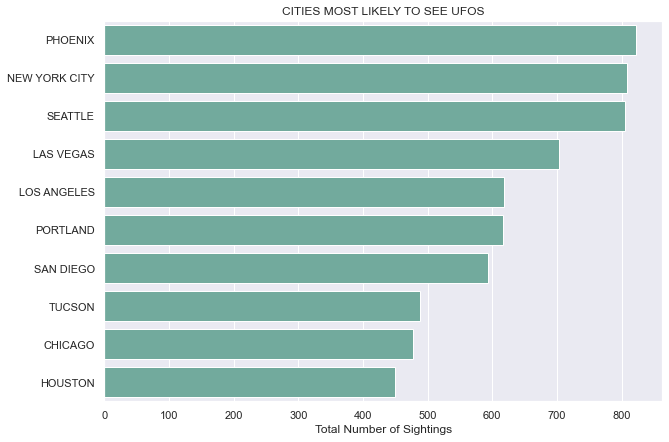

In [175]:
# set plot style: grey grid in the background:
top10city = us_city_counts2.nlargest(10, 'count')
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
ax = sns.barplot(
    x=top10city["count"], 
    y=top10city['city'], 
    data=top10city, 
#   estimator=sum, 
    ci=None, 
    color='#69b3a2');
plt.title('CITIES MOST LIKELY TO SEE UFOS')
plt.xlabel('Total Number of Sightings')
ax.set(ylabel=None);

plt.savefig('CITIES MOST LIKELY TO SEE UFOS')


In [176]:
cities_df = pd.read_csv('../data/uscities.csv')

joining with maps csv for lat & long fields

In [177]:
ufos_map_df = pd.merge(usa_ufos2, cities_df, on=['city','state'], how='left')

In [178]:
ufos_map_df.head()

,occurred,city,state,country,shape,summary,reported,posted,image,county_fips,...,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,2/15/2024 14:20,SHEPHERDSVILLE,KY,USA,ORB,Several sightings over several years.,2/15/2024,2/15/2024,NaN,21029.0,...,-85.7007,14136.0,345.1,shape,False,True,America/New_York,3.0,40165 40166,1.840015e+09
1,2/15/2024 6:21,GREENVILLE,SC,USA,CIRCLE,"Object moving slowing across the sky, suddenly...",2/15/2024,2/15/2024,NaN,45045.0,...,-82.3646,401443.0,917.9,shape,False,True,America/New_York,2.0,29614 29607 29605 29601 29609 29602 29603 2960...,1.840014e+09
2,2/14/2024 22:45,UNKNOWN,VA,USA,LIGHT,Standing to the west of this object it hung in...,2/15/2024,2/15/2024,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/14/2024 22:44,SOMERS,CT,USA,UNKNOWN,"Odd, flashing object I could only describe dur...",2/14/2024,2/15/2024,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/14/2024 22:15,BOSCAWEN,NH,USA,LIGHT,Bright light in sky changing shape but almost ...,2/15/2024,2/15/2024,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


new csv for mapping in Tableau

In [179]:
ufos_map_df.to_csv('ufos_map_df.csv')

In [180]:
city_pop = ufos_map_df[['city', 'state', 'population']]
city_pop

,city,state,population
0,SHEPHERDSVILLE,KY,14136.0
1,GREENVILLE,SC,401443.0
2,UNKNOWN,VA,NaN
3,SOMERS,CT,NaN
4,BOSCAWEN,NH,NaN
...,...,...,...
132440,MANNING,SC,3862.0
132441,NAHUNTA,GA,1386.0
132442,TREVORTON,PA,1695.0
132443,RICHLAND,WA,60867.0


In [181]:
city_count= ufos_map_df[['city', 'state']].value_counts()
city_count = pd.DataFrame(city_count).reset_index()
city_count.columns = ['city', 'state', 'count']

# #us_city_count2.sort_values('count', ascending=False)
# us_city_counts2.nlargest(10, 'count')
city_count

,city,state,count
0,PHOENIX,AZ,822
1,NEW YORK CITY,NY,809
2,SEATTLE,WA,806
3,LAS VEGAS,NV,704
4,LOS ANGELES,CA,618
...,...,...,...
23262,KELLY CROSSROADS,PA,1
23263,KELLYS ISLAND,OH,1
23264,KELLYTON,AL,1
23265,KELLYVILLE,OK,1


In [184]:
per_cap = pd.merge(city_count, city_pop, on=['city', 'state'], how='inner')
per_cap

,city,state,count,population
0,PHOENIX,AZ,822,4064275.0
1,PHOENIX,AZ,822,4064275.0
2,PHOENIX,AZ,822,4064275.0
3,PHOENIX,AZ,822,4064275.0
4,PHOENIX,AZ,822,4064275.0
...,...,...,...,...
132437,KELLY CROSSROADS,PA,1,NaN
132438,KELLYS ISLAND,OH,1,NaN
132439,KELLYTON,AL,1,179.0
132440,KELLYVILLE,OK,1,1086.0


In [190]:
per_cap = per_cap.drop_duplicates()
per_cap.dropna(subset=['population'], inplace=True)
per_cap

,city,state,count,population,per_capita
0,PHOENIX,AZ,822,4064275.0,0.000202
822,NEW YORK CITY,NY,809,18908608.0,0.000043
1631,SEATTLE,WA,806,3561397.0,0.000226
2437,LAS VEGAS,NV,704,2248047.0,0.000313
3141,LOS ANGELES,CA,618,11922389.0,0.000052
...,...,...,...,...,...
132434,KELLOGG,IA,1,635.0,0.001575
132435,KELLOGG,ID,1,2294.0,0.000436
132439,KELLYTON,AL,1,179.0,0.005587
132440,KELLYVILLE,OK,1,1086.0,0.000921


In [191]:
per_cap = per_cap[per_cap['population'] >0]
per_cap

,city,state,count,population,per_capita
0,PHOENIX,AZ,822,4064275.0,0.000202
822,NEW YORK CITY,NY,809,18908608.0,0.000043
1631,SEATTLE,WA,806,3561397.0,0.000226
2437,LAS VEGAS,NV,704,2248047.0,0.000313
3141,LOS ANGELES,CA,618,11922389.0,0.000052
...,...,...,...,...,...
132434,KELLOGG,IA,1,635.0,0.001575
132435,KELLOGG,ID,1,2294.0,0.000436
132439,KELLYTON,AL,1,179.0,0.005587
132440,KELLYVILLE,OK,1,1086.0,0.000921


In [192]:
per_cap['per_capita'] = per_cap['count'] / per_cap['population']

C:\Users\tkwhi\AppData\Local\Temp/ipykernel_15060/1722143596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_cap['per_capita'] = per_cap['count'] / per_cap['population']


In [193]:
per_cap.sort_values('per_capita', ascending=False)

,city,state,count,population,per_capita
88072,LAKE BUENA VISTA,FL,9,7.0,1.285714
65334,RACHEL,NV,20,20.0,1.000000
79146,TONOPAH,AZ,12,13.0,0.923077
109803,GILBERT,AR,3,4.0,0.750000
127706,CEDAR POINT,KS,1,2.0,0.500000
...,...,...,...,...,...
87280,BRONX,NY,9,1472654.0,0.000006
123054,SPRING VALLEY,NV,1,220114.0,0.000005
99625,MANHATTAN,NY,6,1694263.0,0.000004
90860,QUEENS,NY,8,2405464.0,0.000003
